## Week4

# Implementing K-Nearest Neighbours-Iris Dataset

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset import

In [141]:
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Drop redundant columns

In [142]:
df.drop(columns=["Id"],inplace=True)#id is redundant as it is just an index(id number) so not imp in distance calculation
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# View the summary of the dataset

In [143]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Check data types of columns of data frame

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Identify Missing values, NAN in variables

In [145]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Check the distribution of variables using histograms

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

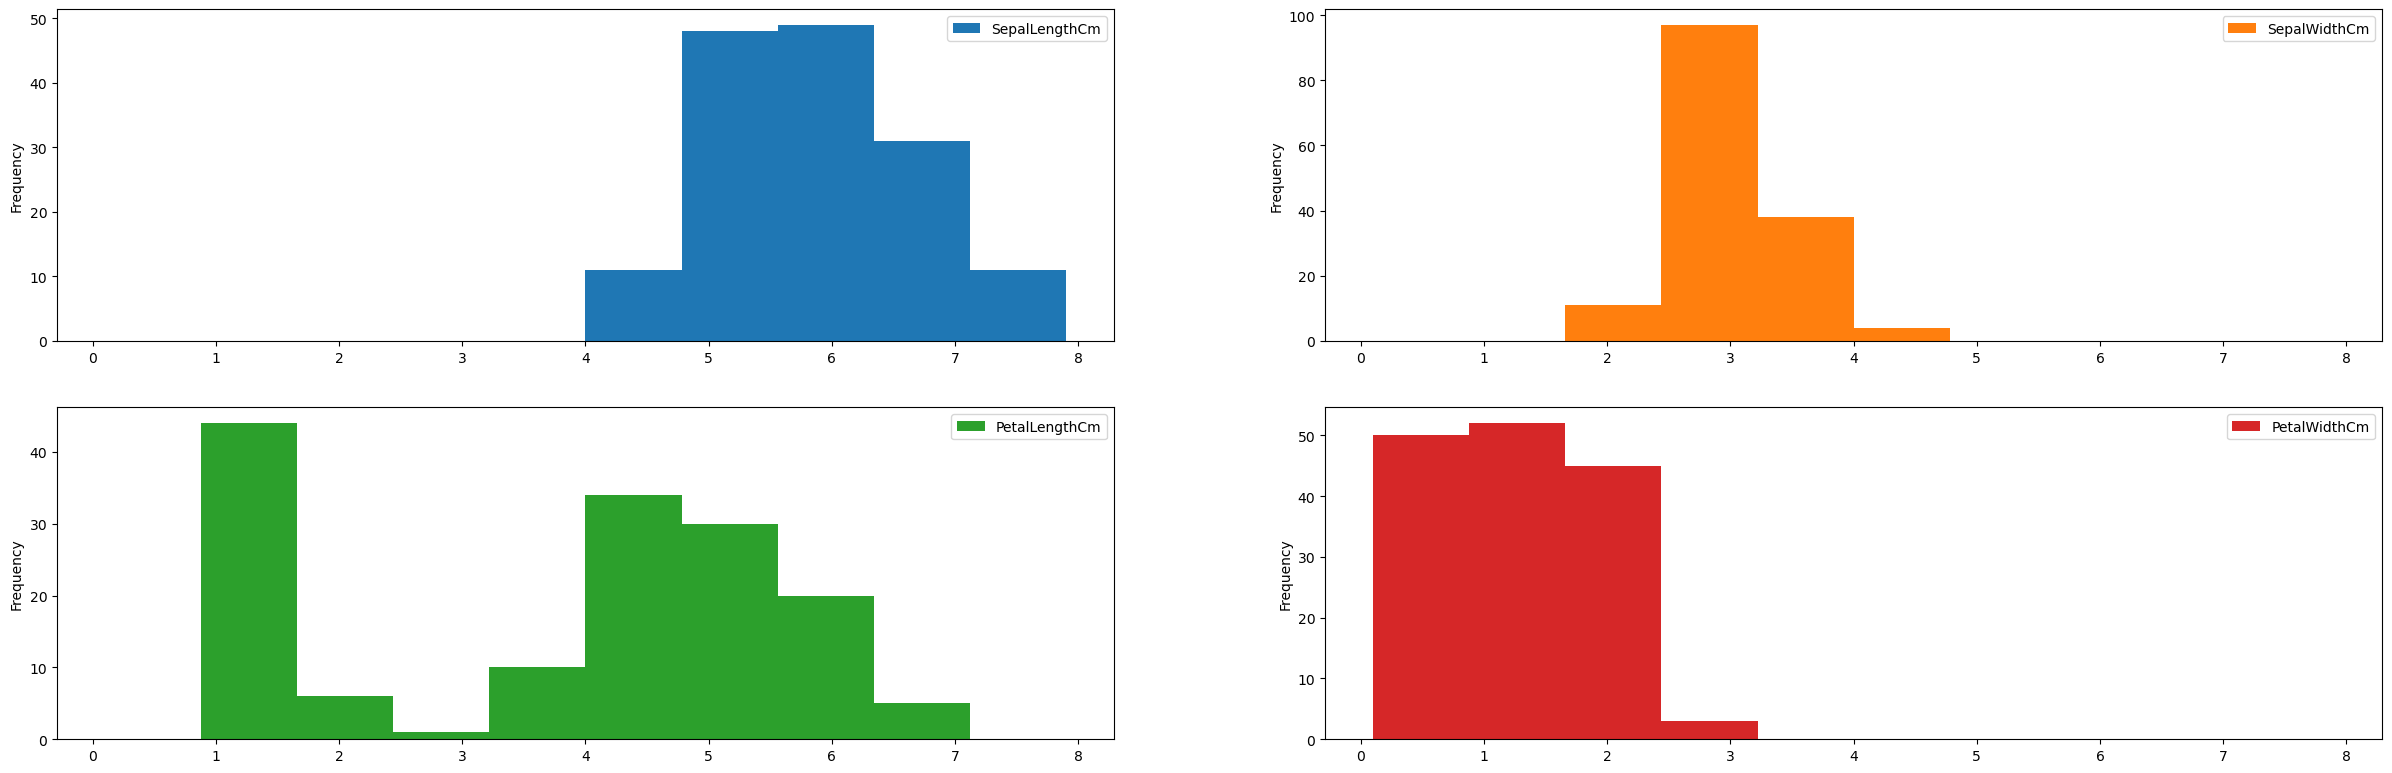

In [146]:
plt.rcParams['figure.figsize']=(30,25)
#The line plt.rcParams['figure.figsize']=(30,25) is setting the default figure size for Matplotlib plots

df.plot(kind='hist',bins=10,subplots=True,layout=(5,2),sharex=False,sharey=False)
#sharex=False, sharey=False: 
#These parameters ensure that each subplot has its own independent x-axis and y-axis, rather than sharing them across subplots.

# Estimate correlation coefficients and represent using heatmaps

C:\Users\Shriya Bhat\AppData\Local\Temp\ipykernel_13316\22239310.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

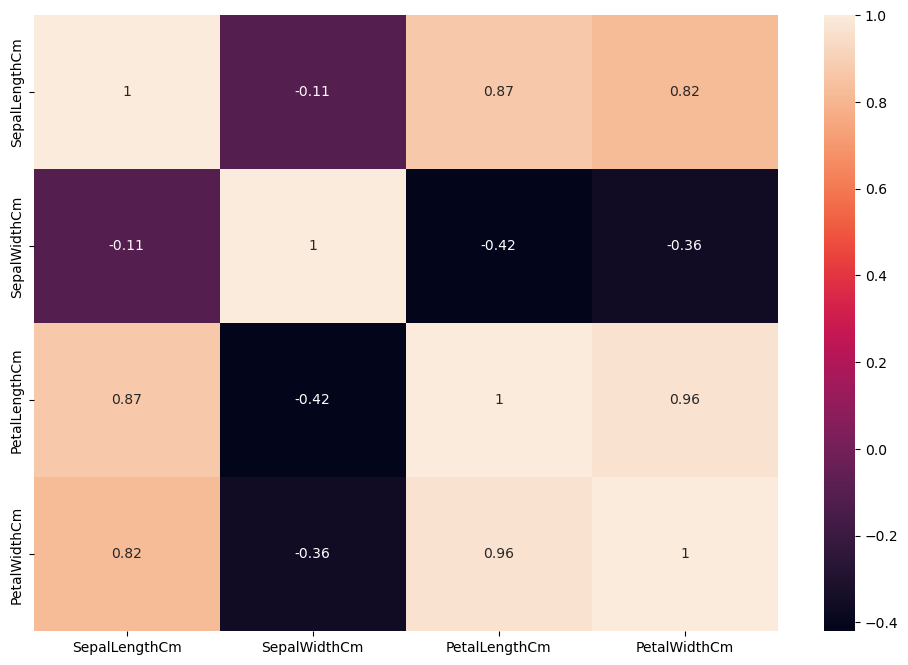

In [147]:
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=corr,annot=True)

In [148]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [149]:
df["Species"]=df["Species"].map({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})

In [150]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Declare feature vector and target variable

In [151]:
feature_vectors=df.iloc[:,:-1]
feature_vectors

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [152]:
target_variable=df.iloc[:,-1]
target_variable

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [153]:
target_variable.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

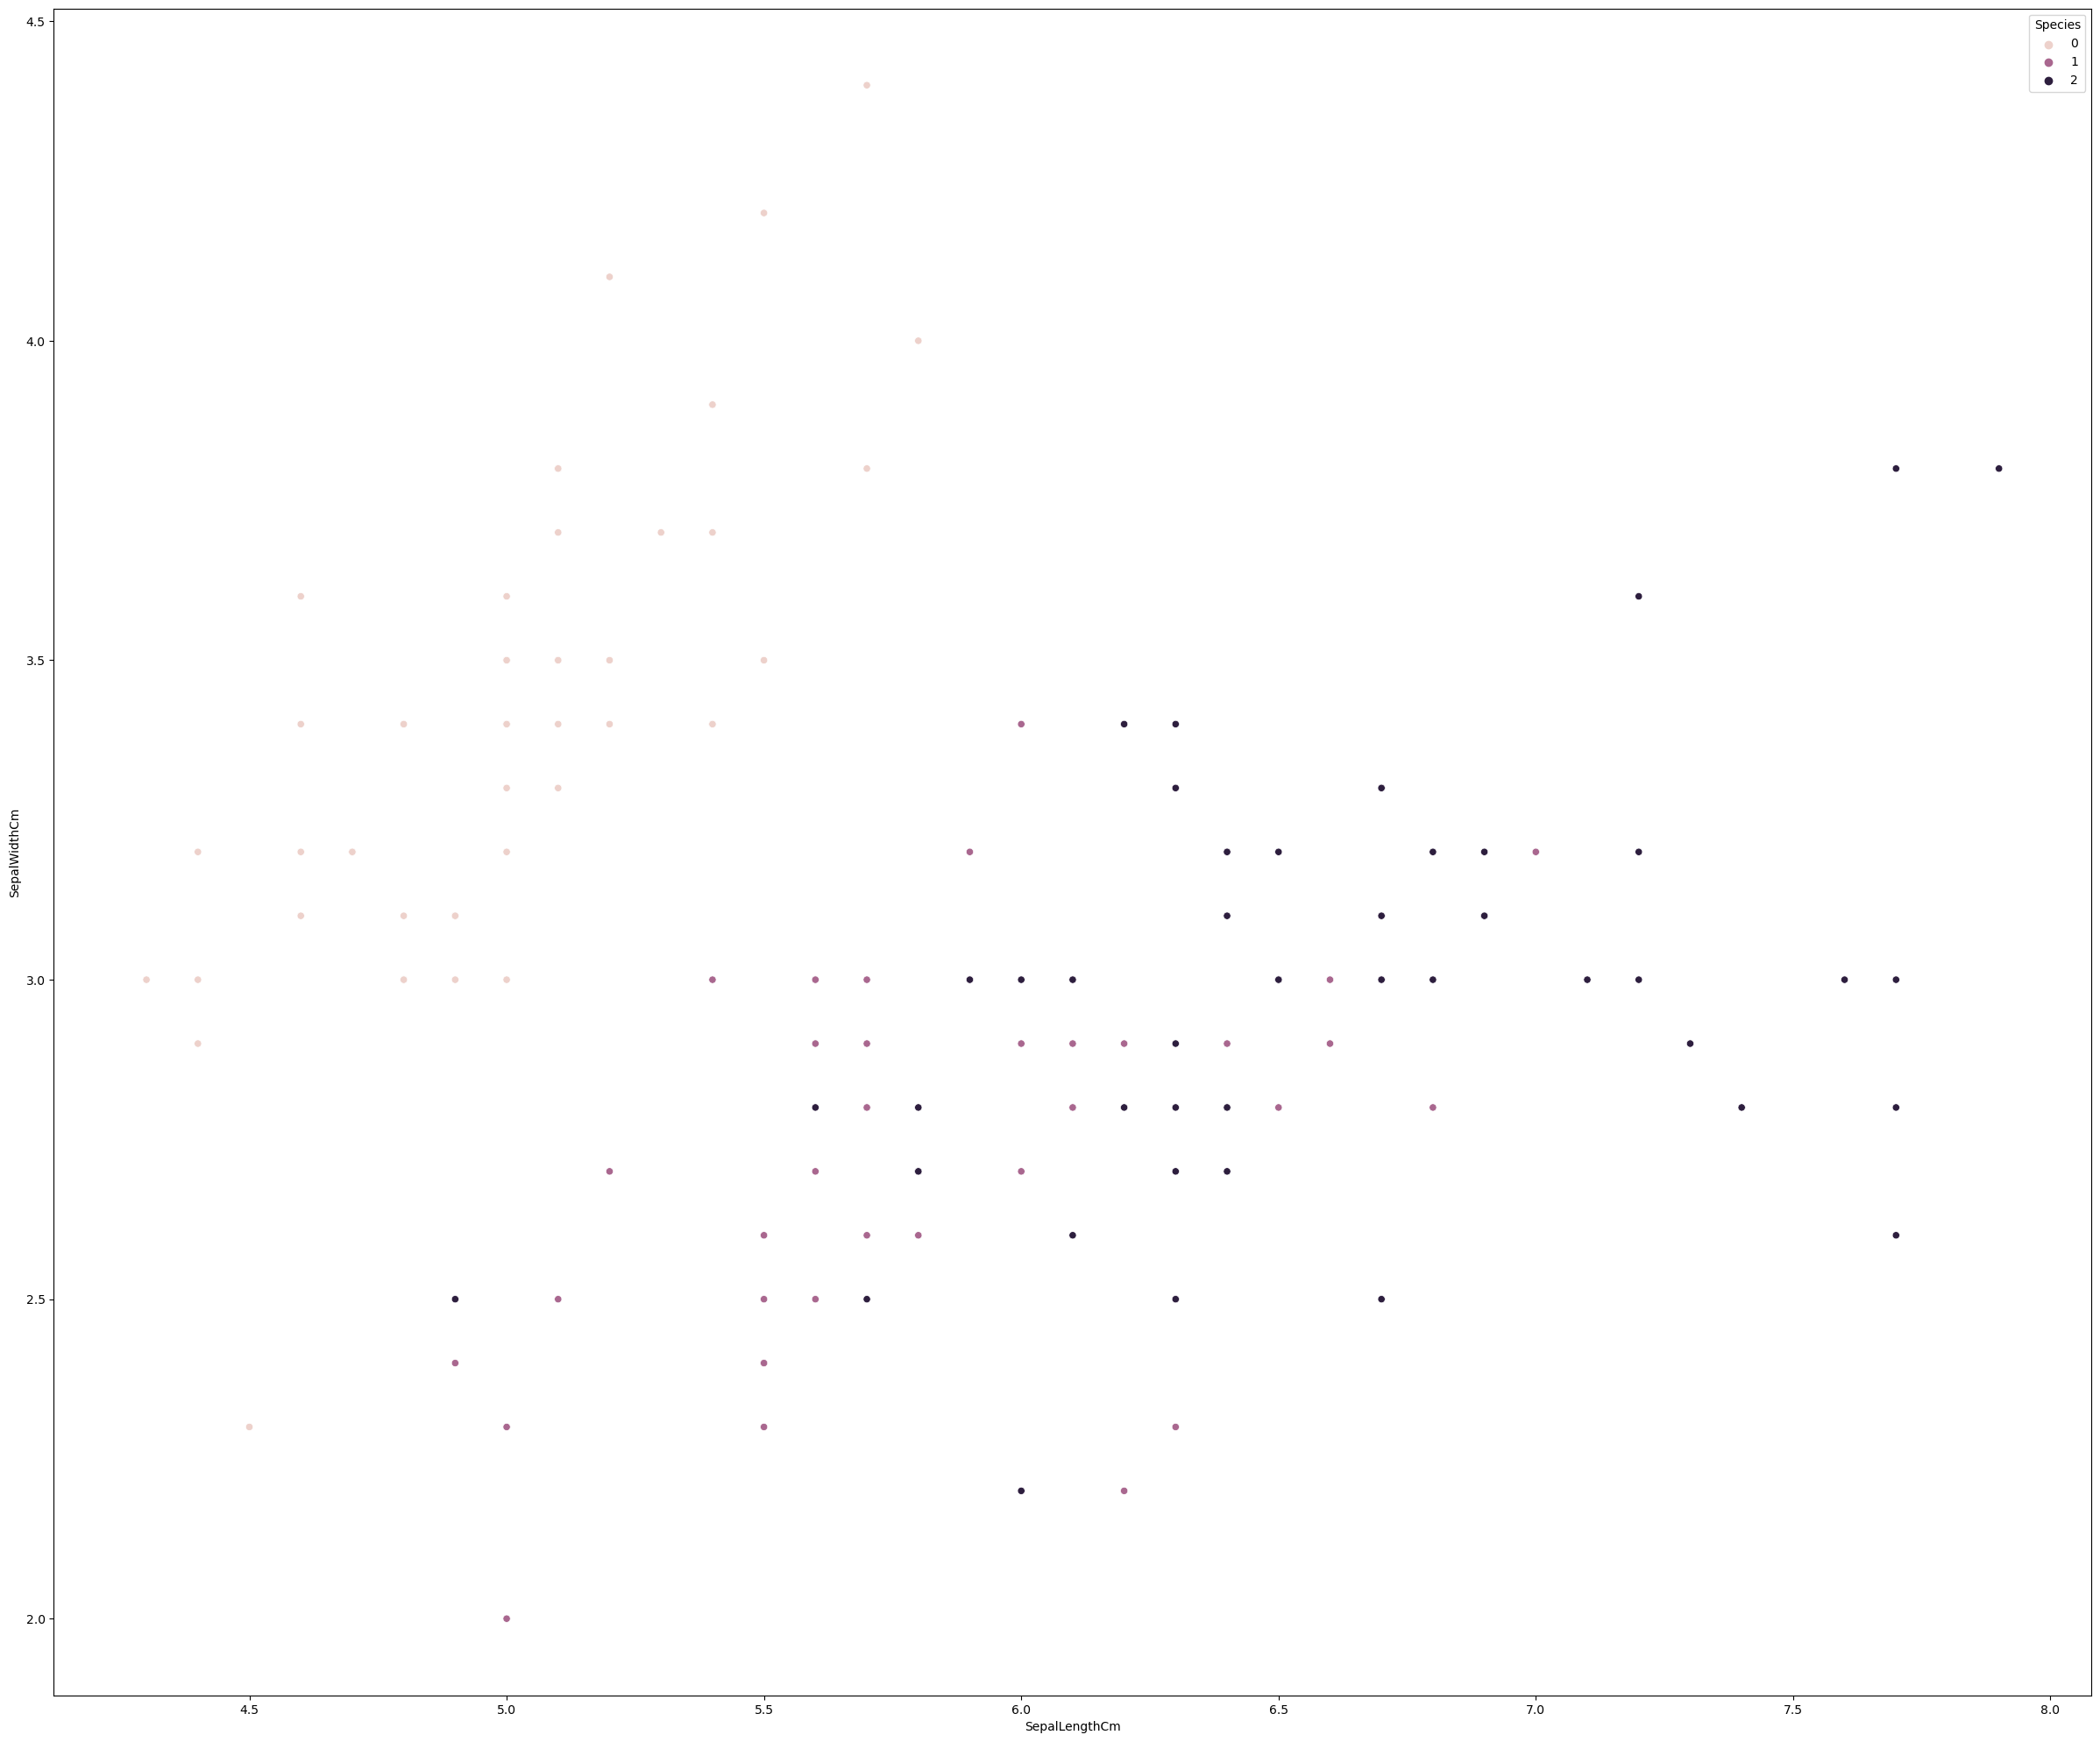

In [154]:
sns.scatterplot(x=feature_vectors["SepalLengthCm"],y=feature_vectors["SepalWidthCm"],hue=target_variable)

In [155]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Implementing K-Nearest Neighbours with K=3

# Split data into separate training and test set

In [156]:
x_train,x_test,y_train,y_test=train_test_split(feature_vectors,target_variable,train_size=0.8,random_state=5)

In [157]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
39,5.1,3.4,1.5,0.2
53,5.5,2.3,4.0,1.3
79,5.7,2.6,3.5,1.0
10,5.4,3.7,1.5,0.2
50,7.0,3.2,4.7,1.4
...,...,...,...,...
8,4.4,2.9,1.4,0.2
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
118,7.7,2.6,6.9,2.3


In [158]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
82,5.8,2.7,3.9,1.2
134,6.1,2.6,5.6,1.4
114,5.8,2.8,5.1,2.4
42,4.4,3.2,1.3,0.2
109,7.2,3.6,6.1,2.5
57,4.9,2.4,3.3,1.0
1,4.9,3.0,1.4,0.2
70,5.9,3.2,4.8,1.8
25,5.0,3.0,1.6,0.2
84,5.4,3.0,4.5,1.5


In [159]:
y_train

39     0
53     1
79     1
10     0
50     1
      ..
8      0
73     1
144    2
118    2
99     1
Name: Species, Length: 120, dtype: int64

In [160]:
y_test

82     1
134    2
114    2
42     0
109    2
57     1
1      0
70     1
25     0
84     1
66     1
133    2
102    2
107    2
26     0
23     0
123    2
130    2
21     0
12     0
71     1
128    2
48     0
72     1
88     1
148    2
74     1
96     1
63     1
132    2
Name: Species, dtype: int64

# Perform Feature Scaling(Normalize)

In [161]:
from sklearn.preprocessing import MinMaxScaler

In [162]:
def scale(df):
    scaler=MinMaxScaler()
    for col in df.columns:
        df[col]=scaler.fit_transform(df[col].values.reshape(-1,1))
    return df

x_train=scale(x_train)

In [163]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
39,0.222222,0.583333,0.084746,0.041667
53,0.333333,0.125000,0.508475,0.500000
79,0.388889,0.250000,0.423729,0.375000
10,0.305556,0.708333,0.084746,0.041667
50,0.750000,0.500000,0.627119,0.541667
...,...,...,...,...
8,0.027778,0.375000,0.067797,0.041667
73,0.500000,0.333333,0.627119,0.458333
144,0.666667,0.541667,0.796610,1.000000
118,0.944444,0.250000,1.000000,0.916667


In [164]:
x_test=scale(x_test)
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
82,0.466667,0.230769,0.52,0.458333
134,0.566667,0.153846,0.86,0.541667
114,0.466667,0.307692,0.76,0.958333
42,0.000000,0.615385,0.00,0.041667
109,0.933333,0.923077,0.96,1.000000
57,0.166667,0.000000,0.40,0.375000
1,0.166667,0.461538,0.02,0.041667
70,0.500000,0.615385,0.70,0.708333
25,0.200000,0.461538,0.06,0.041667
84,0.333333,0.461538,0.64,0.583333


# Fit the K Neighbours Classifier to the training set

In [165]:
KNN=KNeighborsClassifier(n_neighbors=3)

In [166]:
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

# Predict test-set results 

In [167]:
y_pred=KNN.predict(x_test)

In [168]:
y_pred

array([1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2], dtype=int64)

# Check the accuracy score 

In [169]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score

In [170]:
accuracy_3=accuracy_score(y_test,y_pred)
precision_3=precision_score(y_test,y_pred,average=None)#since multiclass shd be written avg=None
f1_3=f1_score(y_test,y_pred,average=None)
recall_3=recall_score(y_test,y_pred,average=None)
print("accuracy is",accuracy_3)
print("precision is",precision_3)
print("f1 is",f1_3)
print("recall is",recall_3)

accuracy is 0.9666666666666667
precision is [1.         0.91666667 1.        ]
f1 is [1.         0.95652174 0.95238095]
recall is [1.         1.         0.90909091]


# Compare the train-set and test-set accuracy

In [171]:
Y_pred=KNN.predict(x_train)
Train_set_accuracy=accuracy_score(y_train,Y_pred)
Train_set_accuracy

0.975

### Train set accuracy is = 0.975 and Train size accuracy = 0.96

# Display confusion matrix

In [172]:
# Print the Confusion Matrix with k =3 and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])





Confusion matrix

 [[ 8  0  0]
 [ 0 11  0]
 [ 0  1 10]]

True Positives(TP) =  8

True Negatives(TN) =  11

False Positives(FP) =  0

False Negatives(FN) =  0


# Generate classification report

Classification Report
Classification report is another way to evaluate the classification model performance.
It displays
<ul>
    <li>Precision</li>
    <li>Recall</li>
    <li>f1 score</li>
    <li>support score</li>
</ul>


In [173]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        11
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [174]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# printing classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print("classification_accuracy",classification_accuracy)


classification_error = (FP + FN) / float(TP + TN + FP + FN)
print("classification_error",classification_error)

classification_accuracy 1.0
classification_error 0.0


#For your understanding
ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR)(Recall) is the ratio of TP to (TP + FN).

False Positive Rate (FPR) is the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

# Generate ROC curve and ROC AUC score.

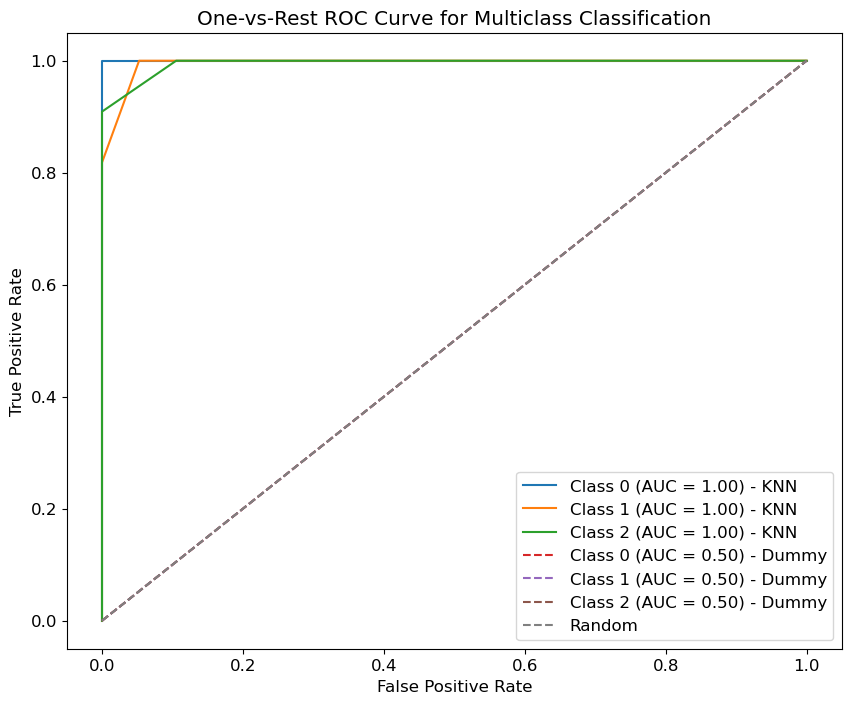

In [177]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

# Assuming y_test is the true class labels and y_scores is the predicted scores
y_test_bin = label_binarize(y_test, classes=range(3))

# KNN model predictions
# Make sure your KNN model has predict_proba method for probability estimates
y_scores = KNN.predict_proba(x_test)

# One-vs-Rest ROC curve and ROC-AUC calculation for KNN
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()

for i in range(3):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

# Dummy Classifier (most frequent class) for comparison
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(x_train, y_train)
y_scores_dummy = clf.predict_proba(x_test)

fpr_dummy = dict()
tpr_dummy = dict()
roc_auc_dummy = dict()

for i in range(3):
    fpr_dummy[i], tpr_dummy[i], _ = roc_curve(y_test_bin[:, i], y_scores_dummy[:, i])
    roc_auc_dummy[i] = auc(fpr_dummy[i], tpr_dummy[i])

# Plot the One-vs-Rest ROC curve for KNN and Dummy Classifier
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(fpr_knn[i], tpr_knn[i], label=f'Class {i} (AUC = {roc_auc_knn[i]:.2f}) - KNN')

for i in range(3):
    plt.plot(fpr_dummy[i], tpr_dummy[i], linestyle='--', label=f'Class {i} (AUC = {roc_auc_dummy[i]:.2f}) - Dummy')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()

# Perform k-fold validation

In [179]:
from sklearn.model_selection import KFold,cross_val_score

In [180]:
kfold=KFold(n_splits=10,shuffle=True,random_state=5)
accuracy=cross_val_score(KNN,feature_vectors,target_variable,cv=kfold,scoring='accuracy')#should pass x and y completely and the model we doing any can be
precision=cross_val_score(KNN,feature_vectors,target_variable,cv=kfold,scoring='precision_macro')
f1=cross_val_score(KNN,feature_vectors,target_variable,cv=kfold,scoring='f1_macro')
recall=cross_val_score(KNN,feature_vectors,target_variable,cv=kfold,scoring='recall_macro')
results = []
for i in range(10):
    results.append([i+1, accuracy[i], precision[i], f1[i], recall[i]])
kfold_results = pd.DataFrame(results, columns=['Fold', 'Accuracy', 'Precision', 'F1 Score', 'Recall'])
kfold_results

,Fold,Accuracy,Precision,F1 Score,Recall
0,1,0.866667,0.877778,0.877778,0.877778
1,2,0.933333,0.944444,0.939394,0.944444
2,3,1.000000,1.000000,1.000000,1.000000
3,4,1.000000,1.000000,1.000000,1.000000
4,5,1.000000,1.000000,1.000000,1.000000
5,6,1.000000,1.000000,1.000000,1.000000
6,7,0.933333,0.952381,0.926740,0.916667
7,8,0.933333,0.944444,0.922078,0.916667
8,9,0.933333,0.888889,0.911111,0.958333
9,10,1.000000,1.000000,1.000000,1.000000


In [181]:
#calculating mean to see model performance
kfold_results.iloc[:,1:5].mean()

Accuracy     0.960000
Precision    0.960794
F1 Score     0.957710
Recall       0.961389
dtype: float64

# Rebuild the kNN Classification model using different values of k (3,4,5,6,7,8,9)

# Tabulate the results using the Tabulate package

In [182]:
from tabulate import tabulate

In [183]:
neighbours = [3, 4, 5, 6, 7, 8, 9]
train_size = [0.75, 0.70, 0.80]
accuracy = {}
precision = {}
f1 = {}
recall = {}

def KNN(neighbours, train_size, feature_vectors, target_variable):
    results = []

    for k in neighbours:
        for i in train_size:
            x_train, x_test, y_train, y_test = train_test_split(feature_vectors, target_variable, train_size=i, random_state=5)
            x_train = scale(x_train)
            x_test = scale(x_test)
            KNN = KNeighborsClassifier(n_neighbors=k)
            KNN.fit(x_train, y_train)
            y_pred = KNN.predict(x_test)
            accuracy[k] = accuracy_score(y_test, y_pred)
            precision[k] = precision_score(y_test, y_pred,average='macro')
            f1[k] = f1_score(y_test, y_pred,average='macro')
            recall[k] = recall_score(y_test, y_pred,average='macro')
            results.append([k, i, accuracy[k], precision[k], f1[k], recall[k]])

    headers = ["K", "Train Size", "Accuracy", "Precision", "F1 Score", "Recall"]
    print(tabulate(results, headers=headers, tablefmt="grid"))

KNN(neighbours, train_size, feature_vectors, target_variable)

+-----+--------------+------------+-------------+------------+----------+
|   K |   Train Size |   Accuracy |   Precision |   F1 Score |   Recall |
+=====+==============+============+=============+============+==========+
|   3 |         0.75 |   1        |    1        |   1        | 1        |
+-----+--------------+------------+-------------+------------+----------+
|   3 |         0.7  |   1        |    1        |   1        | 1        |
+-----+--------------+------------+-------------+------------+----------+
|   3 |         0.8  |   0.966667 |    0.972222 |   0.969634 | 0.969697 |
+-----+--------------+------------+-------------+------------+----------+
|   4 |         0.75 |   0.973684 |    0.977778 |   0.974013 | 0.972222 |
+-----+--------------+------------+-------------+------------+----------+
|   4 |         0.7  |   0.977778 |    0.980392 |   0.977553 | 0.97619  |
+-----+--------------+------------+-------------+------------+----------+
|   4 |         0.8  |   0.933333 |   

# Manual Implementation of KNN-Iris Dataset

In [184]:
df.iloc[0]#gives 0th row

SepalLengthCm    5.1
SepalWidthCm     3.5
PetalLengthCm    1.4
PetalWidthCm     0.2
Species          0.0
Name: 0, dtype: float64

In [185]:
#euclidean distance
def euclidist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [186]:
df.shape

(150, 5)

## taking the K=3 and split ratio(0.8,0.2)

In [187]:
X=df.iloc[:,:-1]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [188]:
y=df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

### Splitting(direct split)

In [189]:
#splitting x and y to train and test with ratio(.8,.2)
x_train=X.iloc[:int(X.shape[0]*.8),:]
x_test=X.iloc[int(X.shape[0]*.8):,:]
y_train=y.iloc[:int(y.shape[0]*.8)]
y_test=y.iloc[int(y.shape[0]*.8):]

In [190]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
115,6.4,3.2,5.3,2.3
116,6.5,3.0,5.5,1.8
117,7.7,3.8,6.7,2.2
118,7.7,2.6,6.9,2.3


In [191]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
120,6.9,3.2,5.7,2.3
121,5.6,2.8,4.9,2.0
122,7.7,2.8,6.7,2.0
123,6.3,2.7,4.9,1.8
124,6.7,3.3,5.7,2.1
125,7.2,3.2,6.0,1.8
126,6.2,2.8,4.8,1.8
127,6.1,3.0,4.9,1.8
128,6.4,2.8,5.6,2.1
129,7.2,3.0,5.8,1.6


In [192]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
115    2
116    2
117    2
118    2
119    2
Name: Species, Length: 120, dtype: int64

In [193]:
y_test

120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: Species, dtype: int64

In [194]:
def KnearestNeighbour(x_train,y_train,x_test,k):
    y_pred=[]
    for i in range(x_test.shape[0]):
        class_0=0
        class_1=0
        class_2=0
        dist=[]
        for j in range(x_train.shape[0]):
            d=euclidist(x_test.iloc[i],x_train.iloc[j])
            dist.append([d,y_train.iloc[j]])#for each distance and label(class of it)
        dist=sorted(dist)
        dist=dist[:k]#getting only k nearest neighbours
        for i in range(len(dist)):
            if(dist[i][1]==0):
                class_0+=1
            elif(dist[i][1]==1):
                class_1+=1
            else:
                class_2+=1
        if(class_0>class_1 and class_0>class_2):
            y_pred.append(0)
        elif(class_1>class_0 and class_1>class_2):
            y_pred.append(1)
        else:
            y_pred.append(2)
    return y_pred

In [195]:
y_pred=KnearestNeighbour(x_train,y_train,x_test,3)

In [196]:
y_pred

[2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1]

In [197]:
#checking if y_pred and y_test are same
if(y_pred==list(y_test)):
    print("y_pred and y_test are same")
else:
    print("y_pred and y_test are not same")

y_pred and y_test are not same


In [198]:
#checking metrices
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print("accuracy is",accuracy)
print("precision is",precision)
print("f1 is",f1)
print("recall is",recall)

accuracy is 0.7666666666666667
precision is 0.0
f1 is 0.0
recall is 0.0


C:\Users\Shriya Bhat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### not so good as direct spliting(not random train and test split)

<Axes: >

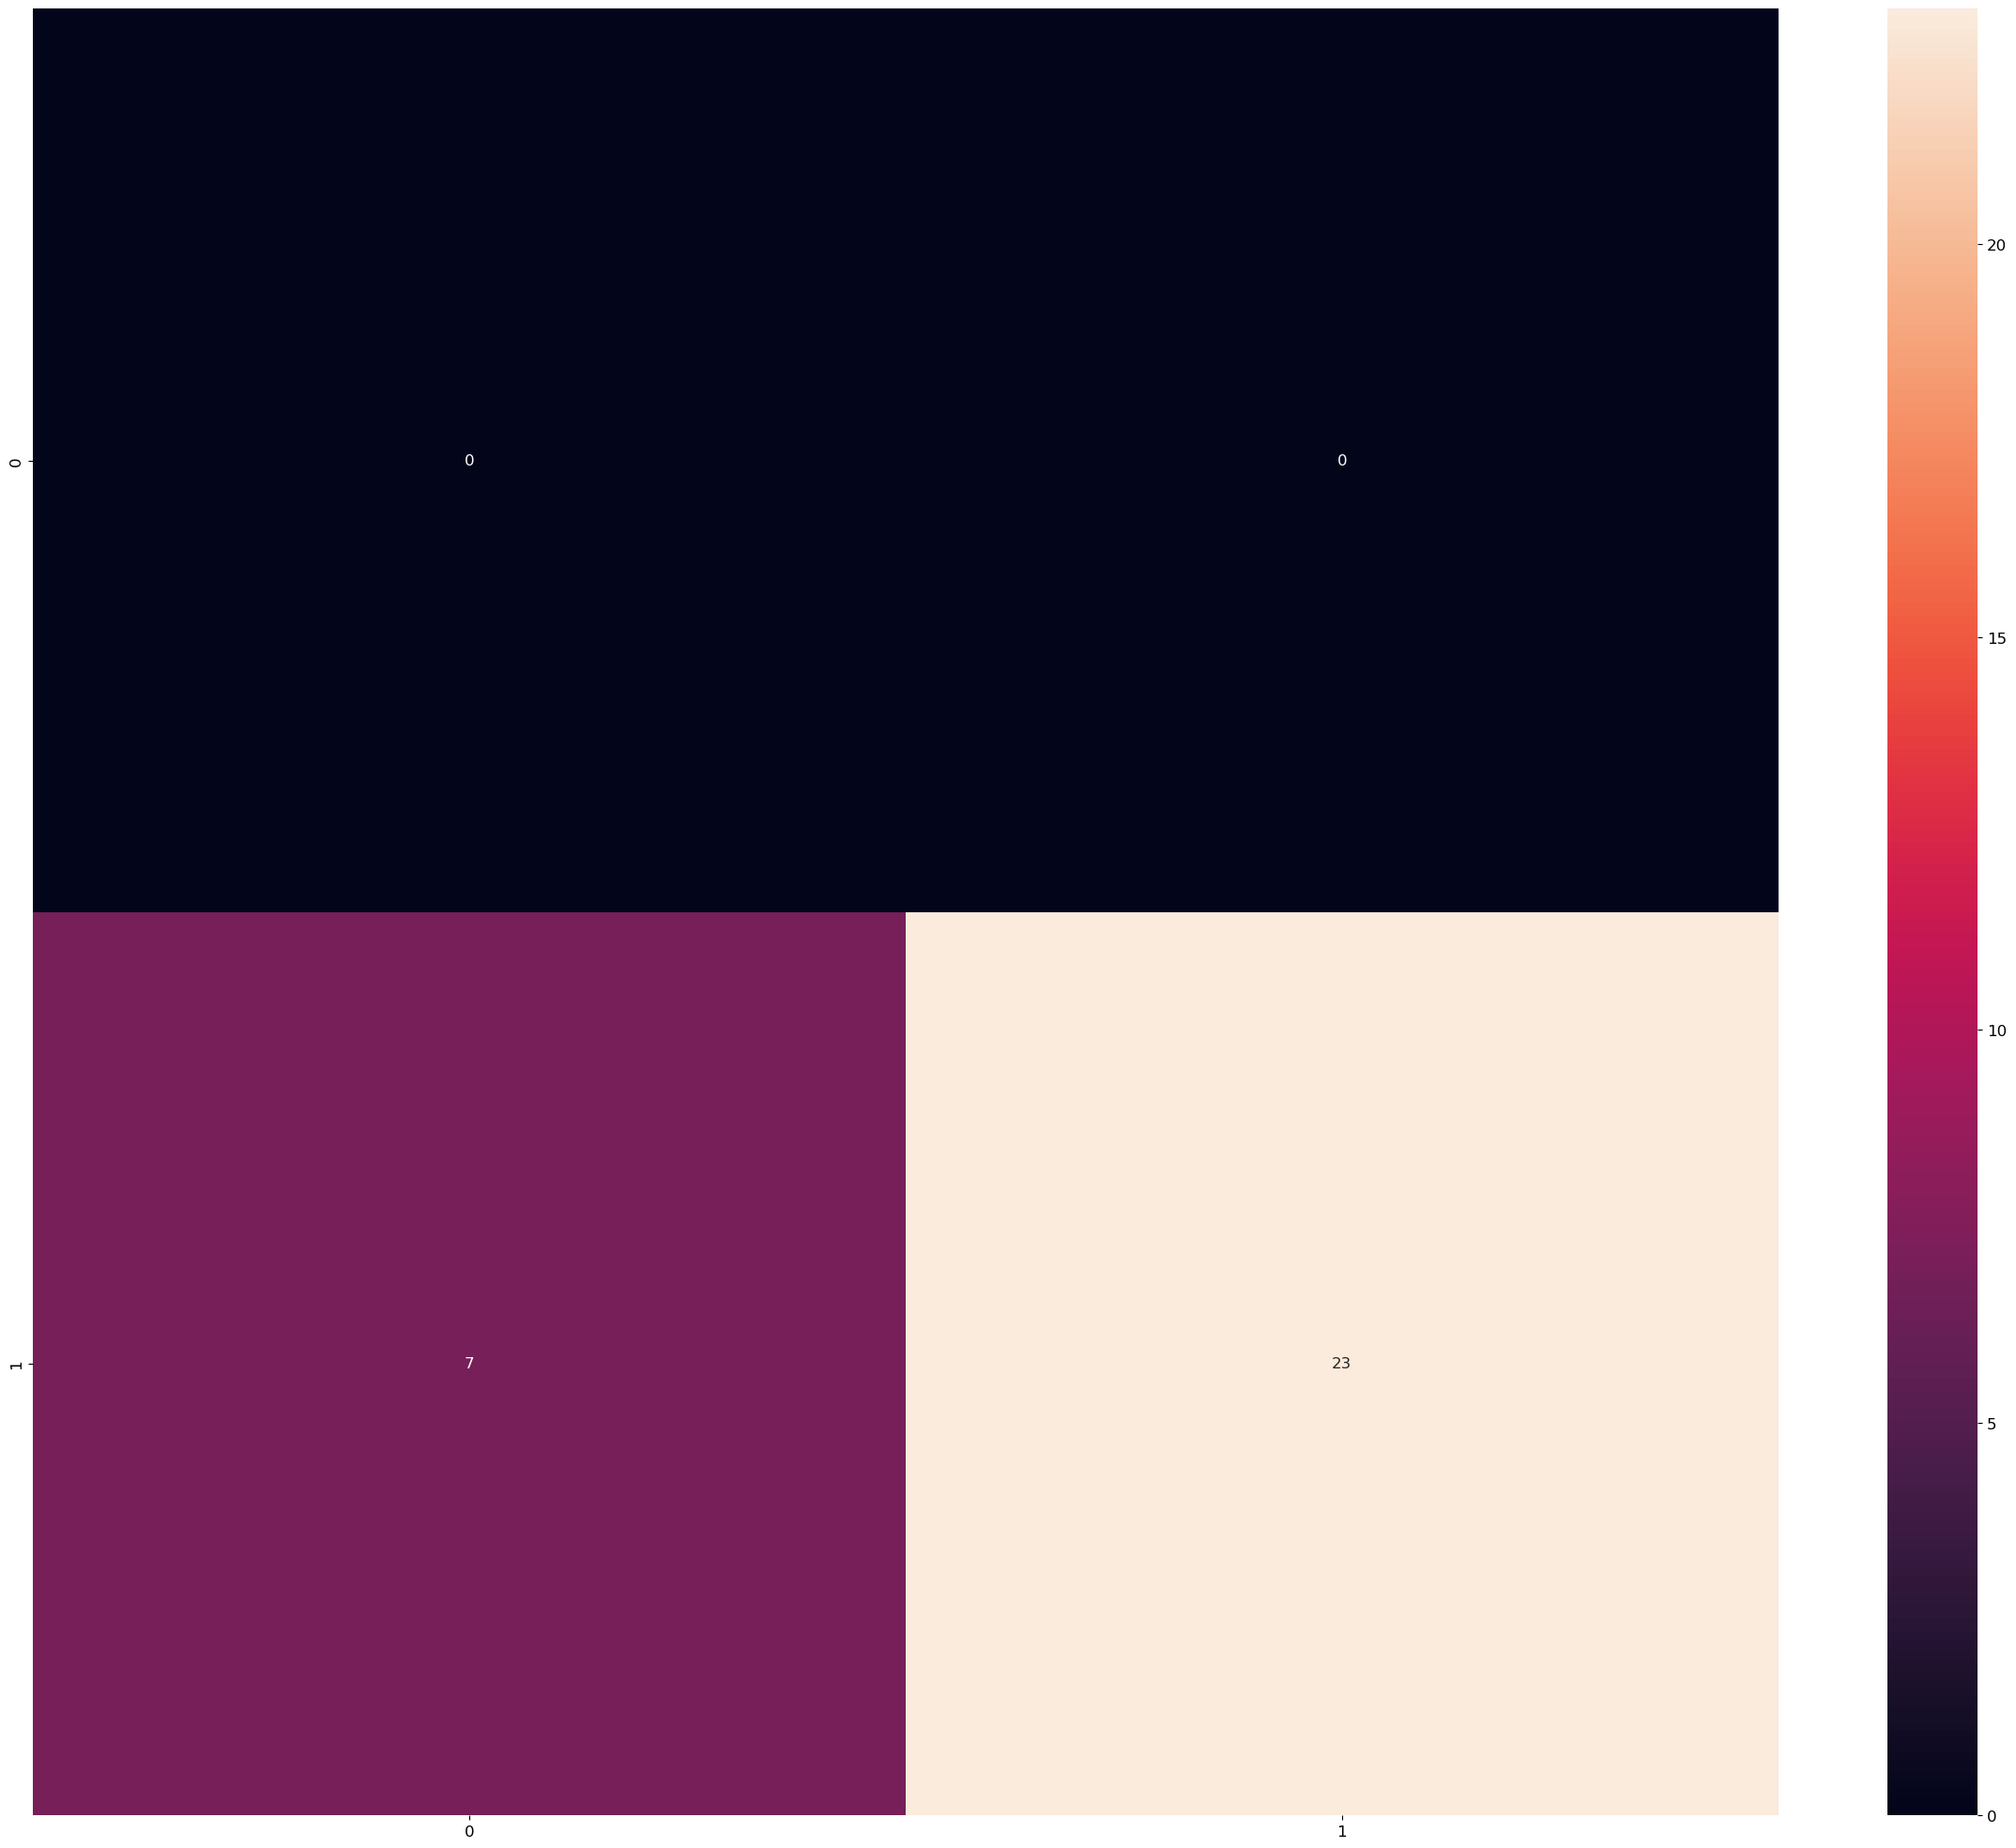

In [199]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

### Splitting(random split)

In [200]:
indices = np.random.permutation(X.shape[0])

# Calculate the split index based on the desired ratio (80-20)
split_index = int(0.8 * X.shape[0])
x_train, x_test = X.iloc[indices[:split_index]], X.iloc[indices[split_index:]]
y_train, y_test = y.iloc[indices[:split_index]], y.iloc[indices[split_index:]]

In [201]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
123,6.3,2.7,4.9,1.8
97,6.2,2.9,4.3,1.3
59,5.2,2.7,3.9,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3
...,...,...,...,...
141,6.9,3.1,5.1,2.3
127,6.1,3.0,4.9,1.8
117,7.7,3.8,6.7,2.2
75,6.6,3.0,4.4,1.4


In [202]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
53,5.5,2.3,4.0,1.3
71,6.1,2.8,4.0,1.3
132,6.4,2.8,5.6,2.2
80,5.5,2.4,3.8,1.1
146,6.3,2.5,5.0,1.9
85,6.0,3.4,4.5,1.6
13,4.3,3.0,1.1,0.1
99,5.7,2.8,4.1,1.3
83,6.0,2.7,5.1,1.6
92,5.8,2.6,4.0,1.2


In [203]:
y_train

123    2
97     1
59     1
9      0
89     1
      ..
141    2
127    2
117    2
75     1
100    2
Name: Species, Length: 120, dtype: int64

In [204]:
y_test

53     1
71     1
132    2
80     1
146    2
85     1
13     0
99     1
83     1
92     1
121    2
54     1
21     0
25     0
41     0
24     0
40     0
81     1
128    2
101    2
87     1
20     0
111    2
104    2
149    2
64     1
94     1
43     0
137    2
65     1
Name: Species, dtype: int64

#### Implementing KNN for random split

In [205]:
y_pred=KnearestNeighbour(x_train,y_train,x_test,3)

In [206]:
y_pred

[1,
 1,
 2,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 1,
 0,
 2,
 1]

In [207]:
#checking if y_pred and y_test are same
if(y_pred==list(y_test)):
    print("y_pred and y_test are same")
else:
    print("y_pred and y_test are not same")

y_pred and y_test are not same


In [208]:
#checking metrices
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='macro')
f1=f1_score(y_test,y_pred,average='macro')
recall=recall_score(y_test,y_pred,average='macro')
print("accuracy is",accuracy)
print("precision is",precision)
print("f1 is",f1)
print("recall is",recall)

accuracy is 0.9666666666666667
precision is 0.9666666666666667
f1 is 0.9691228070175439
recall is 0.9743589743589745


### Seeing good metrices

<Axes: >

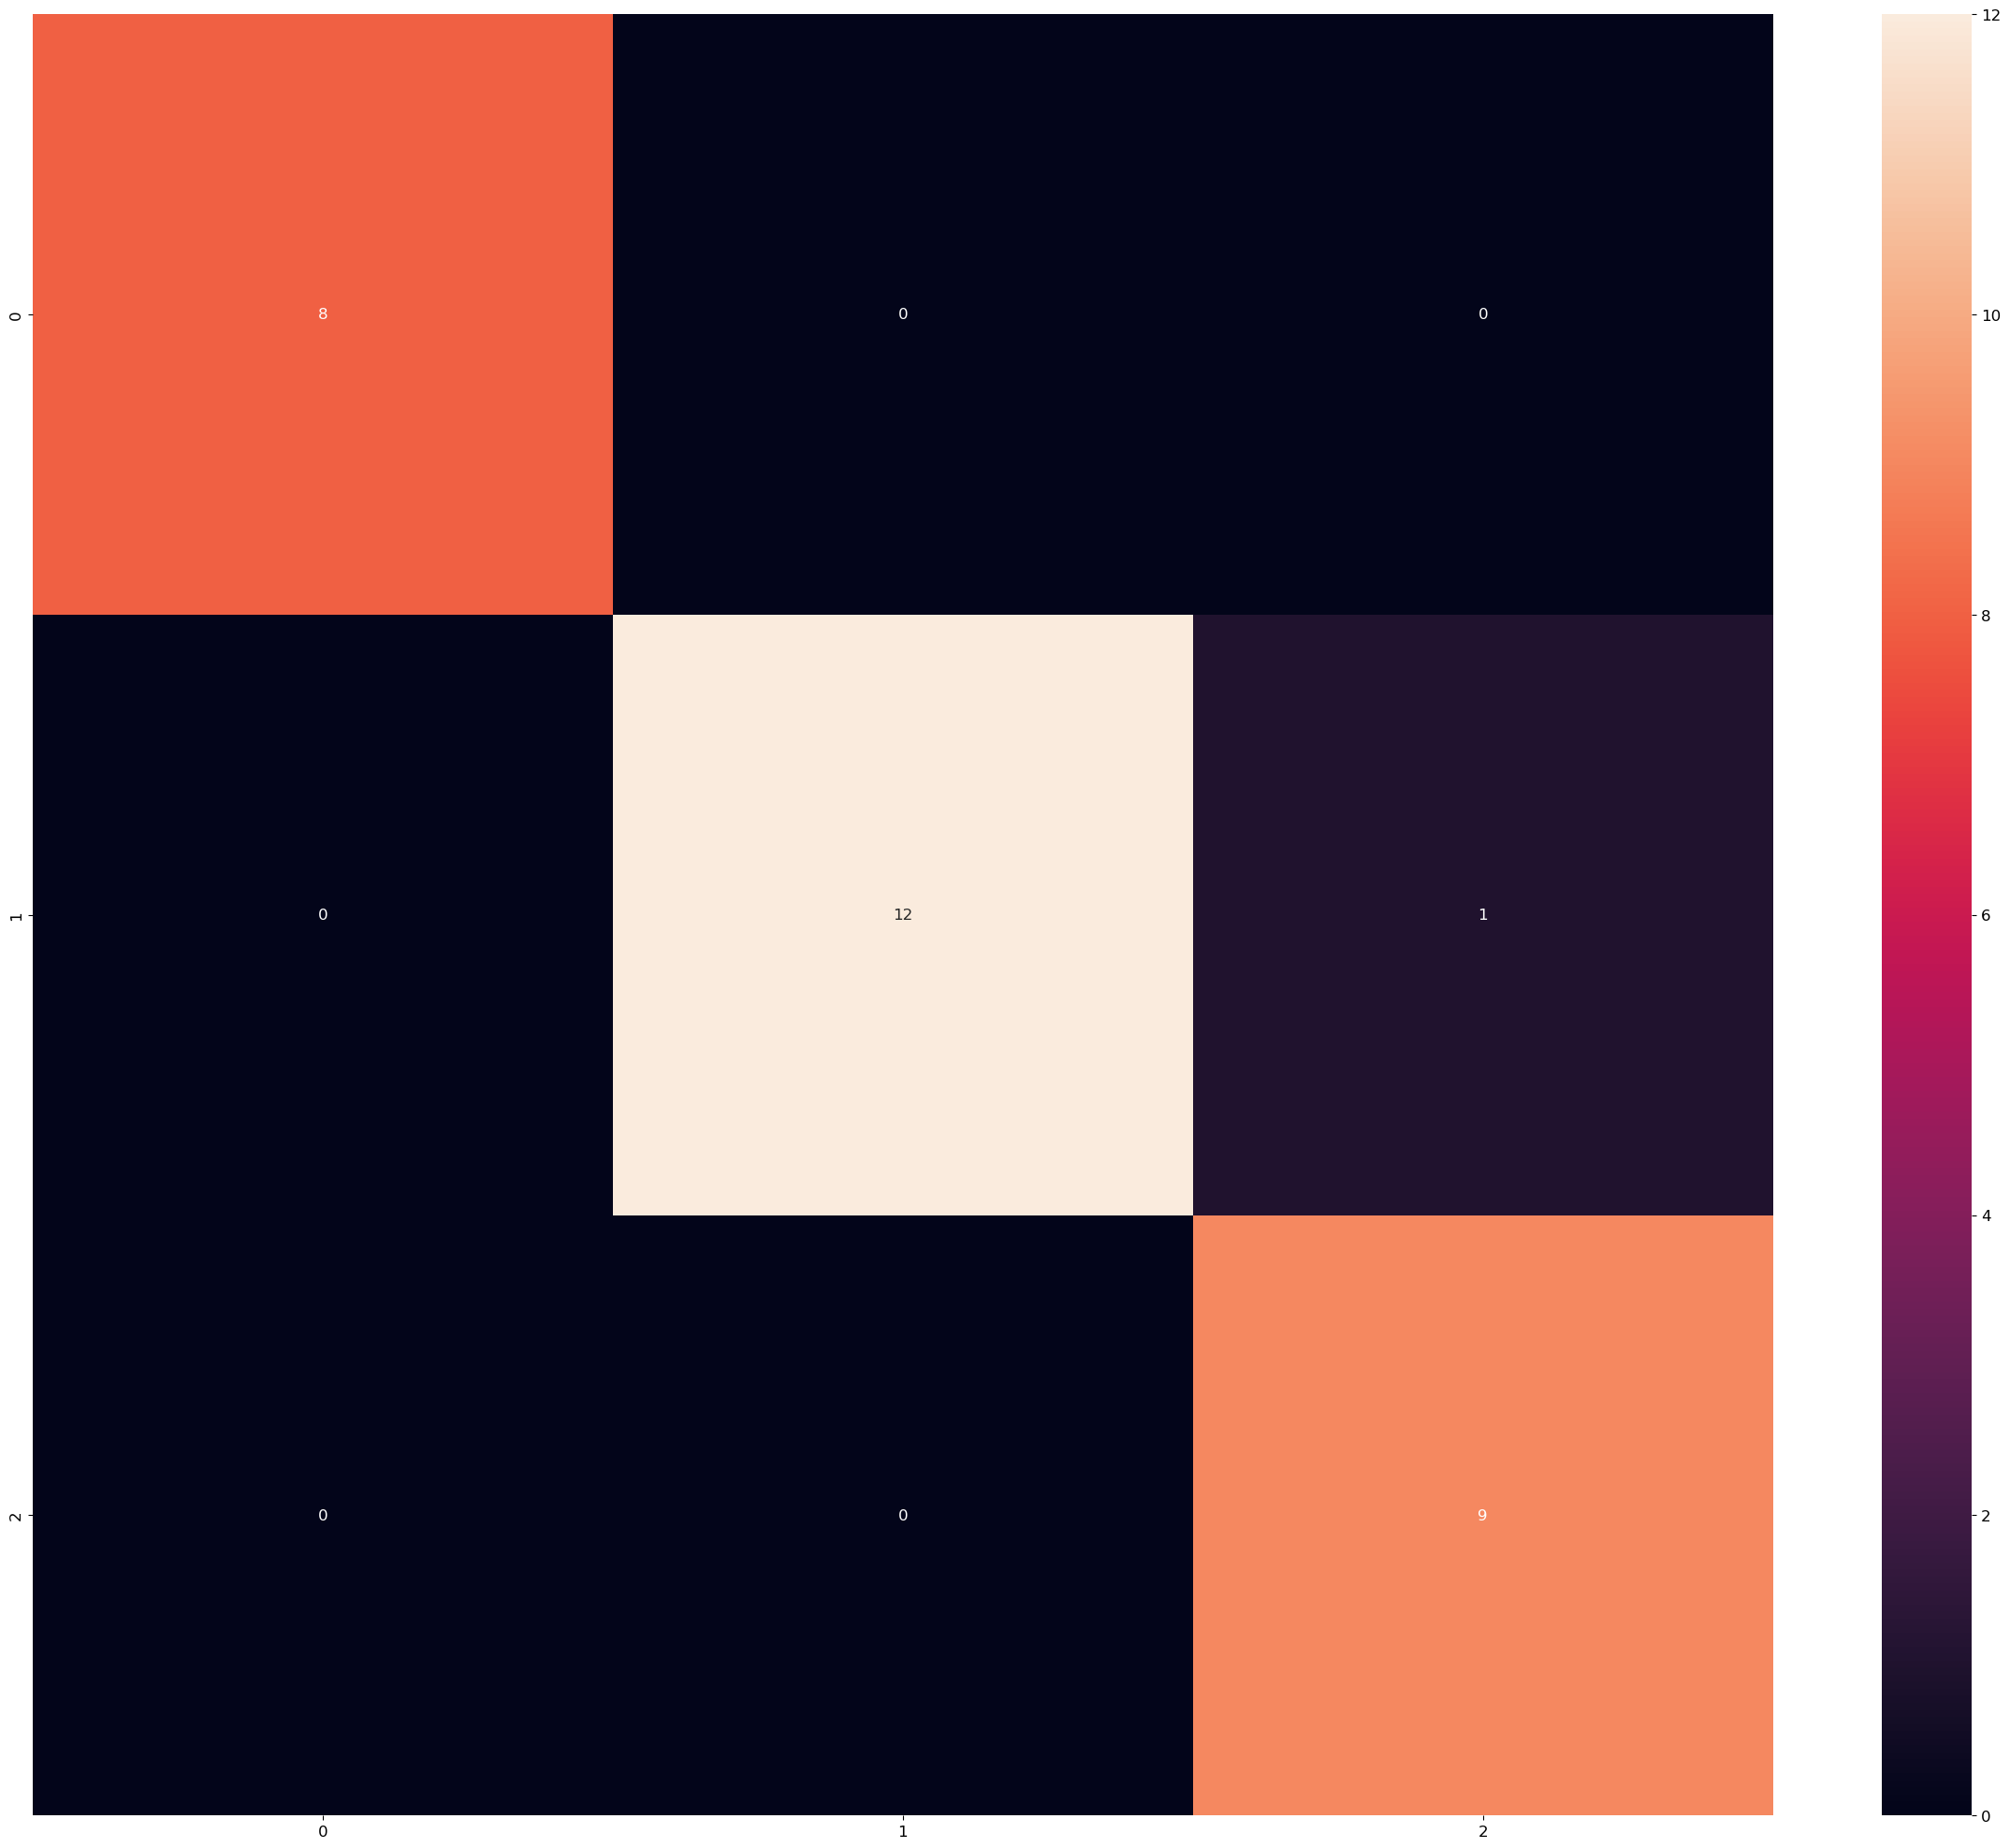

In [209]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

### Good result for random splitting also

# For Predicting with unknown data

In [210]:
def Knnpredict(test,X,y,k):#X is dependent features and y is target variable
    #Using complete dataframe of depenedent features for good classification(with good accuracy) 
    class_0=0
    class_1=0
    class_2=0
    dist=[]
    for j in range(X.shape[0]):
        d=euclidist(X.iloc[j],test)
        dist.append([d,y.iloc[j]])#for each distance and label(class of it)
    dist=sorted(dist)
    dist=dist[:k]#getting only k nearest neighbours
    for i in range(len(dist)):
        if(dist[i][1]==0):
            class_0+=1
        elif(dist[i][1]==1):
            class_1+=1
        else:
            class_2+=1
    if(class_0>class_1 and class_0>class_2):
        y_pred=0
    elif(class_1>class_0 and class_1>class_2):
        y_pred=1
    else:
        y_pred=2
    if(y_pred==0):
        y_pred="Iris-setosa"
    elif(y_pred==1):
        y_pred="Iris-versicolor"
    else:
        y_pred="Iris-virginica"
    return y_pred

In [211]:
test=[6.7,3.3,5.7,2.1]#taking a sample with dependent features to predict

In [212]:
predicted_y=Knnpredict(test,X,y,3)

In [213]:
print(f'the Predicted value of Class for given input is {predicted_y}')

the Predicted value of Class for given input is Iris-virginica
